In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import f_classif
%matplotlib inline

In [54]:
df= pd.read_csv('train.csv', na_filter=False)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


In [55]:
X = df.drop(columns=['Id'])
X = X.drop(columns=df.columns.values[df.isna().any()])
y = df.SalePrice.values
X = X.sample(frac=1).reset_index(drop=True)

In [56]:
cor = X.corr()['SalePrice'].abs().sort_values(ascending=False).iloc[1:4]

In [76]:
X1 = X['OverallQual'].values.reshape(-1,1)
y1 = X.SalePrice.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                    test_size=0.2,
                                                    random_state=42)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
m = linreg.coef_[0][0]
b = linreg.intercept_[0]

In [77]:
regr=LinearRegression().fit(X.OverallQual.values.reshape(-1,1), X.SalePrice.values.reshape(-1,1))

(0, 800000)

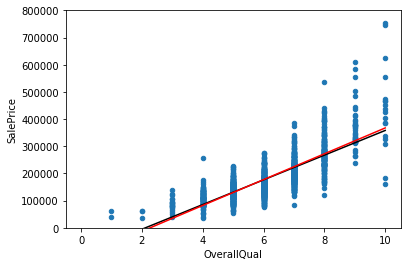

In [78]:
X.plot.scatter(x='OverallQual',y='SalePrice')
x=np.linspace(0,10,1000)
plt.plot(x, regr.predict(x.reshape(-1,1)),'k-')
plt.plot(x, m * x + b, 'r-')
plt.ylim(0,800000)

In [79]:
ypred= linreg.predict(X_test)
plt.hist((ypred-y_test)/y_test, bins=35, histtype='step')

NameError: name 'binS035' is not defined